## Playstore Exploratory Data Analysis to answer business problems by Kushagra Pathak

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import seaborn as sns
import os

In [2]:
# Extracting the path of current working directory with the help of Operating System module
os.getcwd()

'C:\\Users\\Kush\\Board Infinity'

In [3]:
# Importing data (csv file) in python's dataframe 
df = pd.read_csv("C:\\Users\\Kush\\Board Infinity\\playstore-analysis.csv")

In [4]:
# Looking the first five records to get an overview of data 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Using shape attribute to know the number of records and columns 
df.shape

(10841, 13)

In [6]:
# Extracting all the details about columns such as non null values along with the datatype using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:
# running unique method to know the count of unique values in each column
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               460
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
# Using isnull to get count of null values in each column 
df.isnull().sum()
# 8/13 columns don't have any missing values 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 1. Data clean up – Missing value treatment
### Drop records where rating is missing since rating is our target/study variable

In [9]:
# Missing Value Treatment

df.dropna(subset= ['Rating'] ,how = "all", inplace=True)

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column

In [11]:
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## Are all 3 records having the same problem?

### Yes all the 3 records have same missing value

### i. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
# Drop 3rd Record of missing value in Android version and replace remaining values with mode value 
df = df.drop(10472)

In [13]:
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### ii. Replace remaining missing values with the mode

In [14]:
# Filling NaN of Android Ver with Mode
# df['Android Ver'].fillna(df['Android Ver'].mode(), inplace = True)
df['Android Ver'].fillna("4.1 and up", inplace = True)

In [15]:
df[df['Android Ver'].isna()] #checking if there is any missing values after changes are made

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
df['Android Ver'].mode() # Extracted most repetative value of Android Ver column to replace with NaN

0    4.1 and up
dtype: object

### c. Current ver – replace with most common value

In [17]:
# Checking for null values in Current Ver 
df['Current Ver'].isnull().sum()
df['Current Ver'].mode()

0    Varies with device
dtype: object

In [18]:
##df['Current Ver'].fillna(df['Current Ver'].mode(), inplace = True)
df['Current Ver'].fillna("Varies with device", inplace = True)

In [19]:
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 2. Data clean up – correcting the data types

In [21]:
#Checking for the datatypes using dtype attrinute

df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### a. Which all variables need to be brought to numeric types?

In [22]:
'''Columns which require conversion:
1) Reviews should be numeric(integer) instead of object
2) Installs should not have "+" and "," signs and must be integer
3) Price should also be converted from object dtype to float and remove '$' sign
4) Last_Updated should be a date instead of Object'''

'Columns which require conversion:\n1) Reviews should be numeric(integer) instead of object\n2) Installs should not have "+" and "," signs and must be integer\n3) Price should also be converted from object dtype to float and remove \'$\' sign\n4) Last_Updated should be a date instead of Object'

In [23]:
#pd.to_numeric(df['Reviews'])
df['Reviews'] = df['Reviews'].astype(int)

In [24]:
df['Reviews'].dtypes

dtype('int32')

### b. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [25]:
# removing "+" , "," sign from installs column and converting it to integer
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].astype(int)

<ipython-input-25-96332376b189>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


In [26]:
df['Installs'].dtypes

dtype('int32')

### c. Price variable – remove $ sign and convert to float 

In [27]:
# removing "$" sign from Price column and converting it to Float
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)

<ipython-input-27-98f46765dade>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


In [28]:
df['Price'].dtypes

dtype('float64')

### d. Convert all other identified columns to numeric

In [29]:
df['Last Updated']= pd.to_datetime(df['Last Updated'])
df['Last Updated'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 951.2+ KB


## 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
### i. Are there any such records? Drop if so.

In [30]:
df[(df['Rating'] <= 0) & (df['Rating'] > 5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### No such anamoly is present in the data

### b. Reviews should not be more than installs as only those who installed can review the app.
### i. Are there any such records? Drop if so.

In [31]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [32]:
# Placing all such values' indexes in a single variable and dropping the variable using drop function
Droprv = df[df['Reviews'] > df['Installs']].index

df.drop(Droprv , inplace = True)

In [33]:
# Checking after running the drop command 
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4. Identify and handle outliers – 
### a. Price column
### i. Make suitable plot to identify outliers in price

C:\Users\Kush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


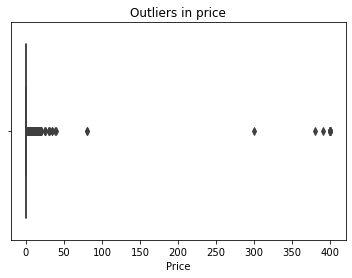

In [34]:
x = df['Price']
sns.boxplot(x)
plt.title("Outliers in price")
plt.show()

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [35]:
df[df['Price'] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


### iii. Limit data to records with price < $30

In [36]:
# Dropping columns having Price above thirty 
above_thrty = df[df['Price'] > 30].index
df.drop(above_thrty, inplace = True)
df[df['Price'] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### iv. After dropping the useless records, make the suitable plot again to identify outliers

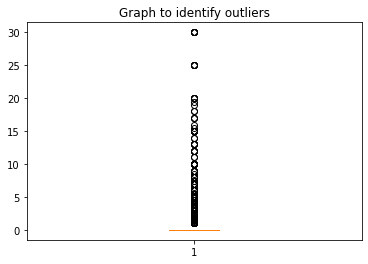

In [37]:
x = df['Price']
plt.boxplot(x)
plt.title("Graph to identify outliers")
plt.show()

### b. Reviews column
### i. Make suitable plot

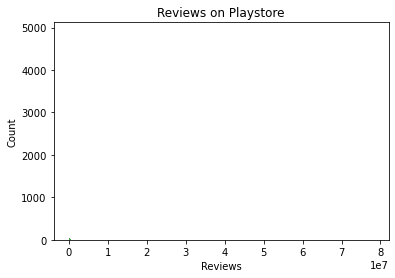

In [38]:
sns.histplot(df['Reviews'] , color ='g')
plt.title("Reviews on Playstore")
plt.show()

### ii. Limit data to apps with < 1 Million reviews

In [39]:
df[df['Reviews'] > 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,2018-06-11,1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,2018-08-06,Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,2018-08-03,1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,2013-10-28,3.0.3,2.1 and up


In [40]:
# Dropping columns having Reviews above 1 Million 
above_onem = df[df['Reviews'] > 1000000].index
df.drop(above_onem, inplace = True)
df[df['Reviews'] > 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### c. Installs
### i. What is the 95th percentile of the installs?

In [41]:
# Checking the value of 95th percentile of 'installs' column
percent_95 = df['Installs'].quantile(0.95)
print(percent_95)

10000000.0


#### 10000000.0 is the 95th percentile of the 'installs'

### ii.Drop records having a value more than the 95th percentile

In [42]:
# Dropping the value above 95th percentile in 'Installs' column 
above_95 = df[df['Installs'] > percent_95].index
df.drop(above_95, inplace = True)

In [43]:
# Checking values after running the drop command
df[df['Installs'] > percent_95]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
### a. How do you explain this?

C:\Users\Kush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


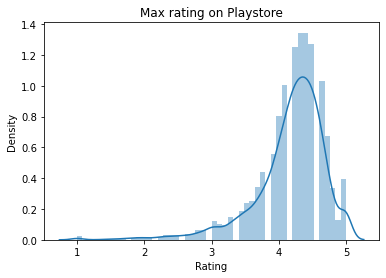

skewness =  -1.7434270330647985


In [44]:
sns.distplot(df['Rating'])
plt.title("Max rating on Playstore")
plt.show()
print("skewness = ", df['Rating'].skew())

In [45]:
df['Rating'].mean()

4.170800237107298

In [46]:
df['Rating'].median()

4.3

In [47]:
df['Rating'].mode()

0    4.3
dtype: float64

### The data is more skewed towards lower values

### b. What is the implication of this on your analysis?

### skewness =  -1.7434270330647985 , mode = median and mean is less than median which implicates that the more amount of data is present in the left side of the graph

### 6. What are the top Content Rating values?
### a. Are there any values with very few records?

In [48]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### "Adults only 18+" and "Unrated" have values in single digit which doesn't affect the outcome of data

### b. If yes, drop those as they won’t help in the analysis

In [49]:
# Dropping columns having content rating with negligible values.
neg1 = df[df['Content Rating'] == 'Adults only 18+'].index
df.drop(neg1, inplace = True)
neg2 = df[df['Content Rating'] == 'Unrated'].index
df.drop(neg2, inplace = True)

In [50]:
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

### 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

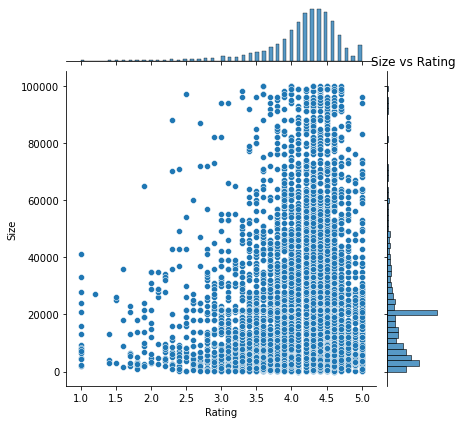

In [51]:
'''ValueError: Could not interpret value `Rating` for parameter `x'''

sns.jointplot(y ='Size', x ='Rating', data =df , kind ="scatter")
plt.title("Size vs Rating")
plt.show()

### b. Do you see any patterns?
### Yes

### c. How do you explain the pattern?
### By looking at the graph we can conclude that application with higher rating has more size comparing to the apps with lower rating which shows positive correlation between Size and Rating.

### 8. Effect of price on rating
### a. Make a jointplot (with regression line

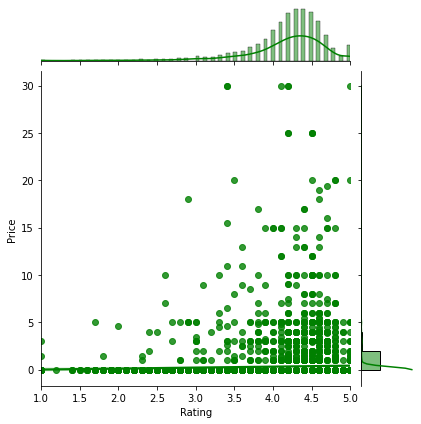

In [52]:
sns.jointplot(x = 'Rating', y = 'Price' , data= df , color = 'g' , kind='reg')
plt.show()

### b. What pattern do you see?
### Even when the price is high, the rating remains around or above 4.0 (constant)

### c. How do you explain the pattern?
### Price and Rating also has positive correlation between them

### d. Replot the data, this time with only records with price > 0

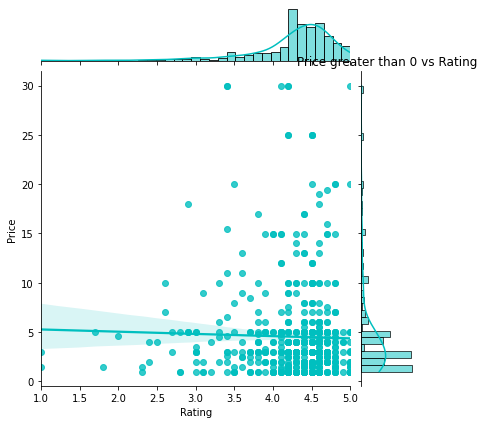

In [53]:
priceg0=df.loc[df.Price>0]
sns.jointplot(x='Rating', y='Price', data=priceg0, color = 'c' ,kind='reg')
plt.title("Price greater than 0 vs Rating")
plt.show()

### e. Does the pattern change?
### There is no major change can be seen except on the y axis. As there are more free apps on the platform the bump occuring on the price 0 has been removed in this graph

### f. What is your overall inference on the effect of price on the rating
### After looking at the visual representation, it can be said that the price doesn't have a significant effect on Rating 

### 9. Look at all the numeric interactions together – 
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

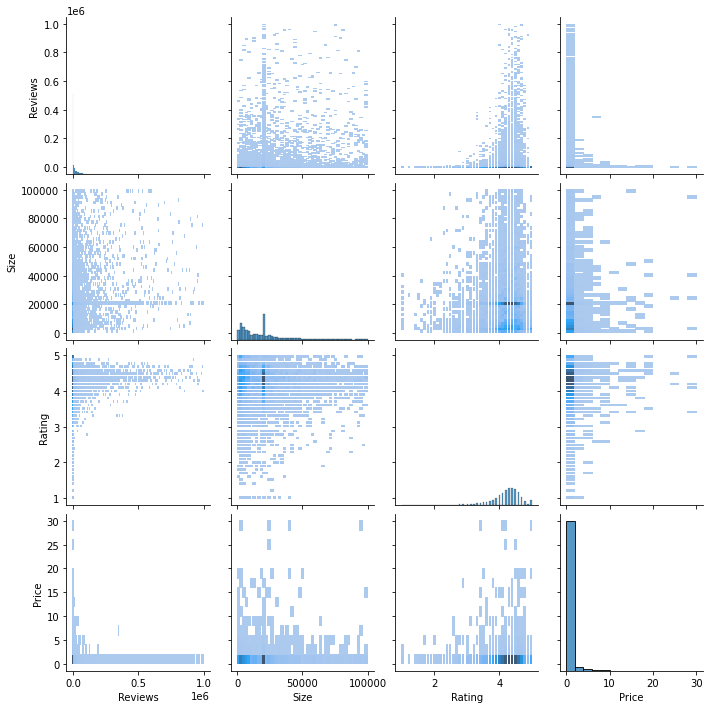

In [54]:
sns.pairplot(df, vars=['Reviews','Size','Rating','Price'], kind='hist')
plt.show()

### 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

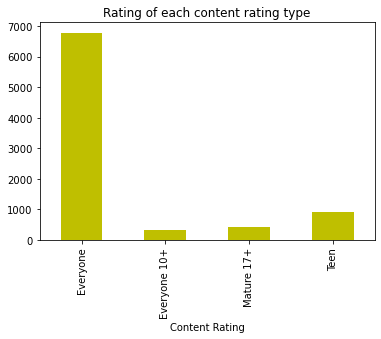

In [55]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color='y')
plt.title("Rating of each content rating type")
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

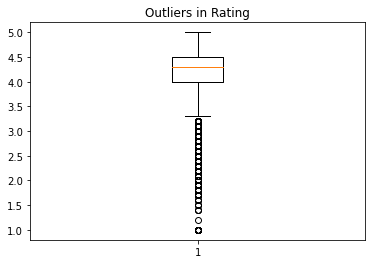

In [56]:
# Checking for Outliers
plt.boxplot(df['Rating'])
plt.title("Outliers in Rating")
plt.show()

### Median will be an appropriate metric to be used because Rating contains outliers.

### c. Choose the right metric and plot

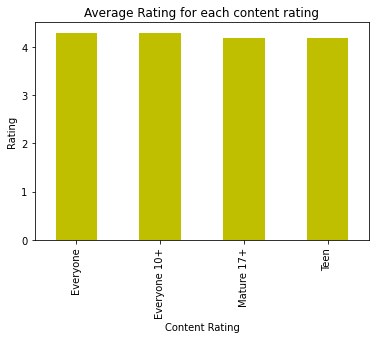

In [57]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color='y',ylabel = 'Rating',title = "Average Rating for each content rating")
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time
### a. Create 5 buckets (20% records in each) based on Size

In [58]:
buckets = [0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], buckets, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pvt = pd.pivot_table(df, index='Bucket Size', values='Rating', columns='Content Rating')
pvt

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [59]:
# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, 
#dropna=True, margins_name='All', observed=False, sort=True)

pvt2 = pd.pivot_table(df, index='Bucket Size', values='Rating', columns='Content Rating', aggfunc = lambda rating:np.quantile(rating,0.2))
pvt2

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


### c. Make a heatmap of this
#### i. Annotated

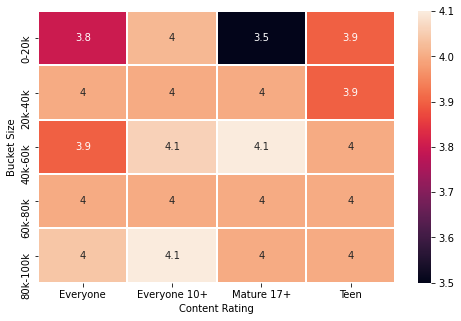

In [60]:
'''seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', 
annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', 
yticklabels='auto', mask=None, ax=None, **kwargs'''

plt.figure(figsize=(8,5))
sns.heatmap(pvt2, annot=True, linewidth = 1)
plt.show()

#### ii. Greens color map

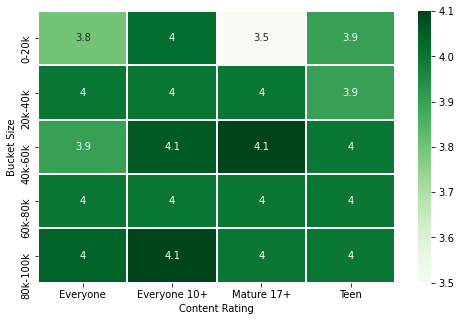

In [61]:
plt.figure(figsize=(8,5))
sns.heatmap(pvt2, annot=True, linewidth = 1, cmap = 'Greens')
plt.show()

In [62]:
pvt2.describe()

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
count,5.00000,5.000000,5.000000,5.000000
mean,3.94800,4.036000,3.920000,3.960000
std,0.09757,0.043359,0.238747,0.054772
min,3.80000,4.000000,3.500000,3.900000
25%,3.90000,4.000000,4.000000,3.900000
50%,4.00000,4.020000,4.000000,4.000000
75%,4.00000,4.060000,4.000000,4.000000
max,4.04000,4.100000,4.100000,4.000000


### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
### In the heatmap we can clearly see that size above 40k have ratings >= 4 which iiself tells us that heavier apps are prefered in all categories.